In [89]:
import pandas as pd
import seaborn as sns
from ephesus.data import get_data_json
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

In [15]:
df = get_data_json()
df.head()

,fichier,translation
0,3e7ffb67-8872-4172-bf18-4fe338ecae3f_64e118fc-...,"Nouvelle ordonnance pour madame Vilain, valabl..."
1,2d035c4b-cdfa-4982-87dc-916fe07a0824_50e8d80a-...,"Prise de sang réalisée au domicile, ce jour, l..."
2,f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_3ab44a1b-...,Prise de sang réalisée le 12 mai puis le 9 jui...
3,a5050600-95ef-43d8-a5fa-a57c791bf843_2af70417-...,"Injection intramusculaire cet après-midi, pas ..."
4,9f980dcf-b431-4e67-876f-2b8e288b7900_777f3b22-...,Test PCR remboursable fait le 8 février à 11h1...


In [17]:
tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner-with-dates")

In [21]:
nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

In [106]:
sample_size = len(df)#sample_size = 1000
df_sample = df.sample(sample_size).copy()

df_sample["camembert"] = nlp(df_sample["translation"].to_list())
df_sample

,fichier,translation,camembert
1578,a5050600-95ef-43d8-a5fa-a57c791bf843_06fd0ae2-...,Test antigénique réalisé cet après midi au cab...,[]
663,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_37e32d96-...,Bilan sanguin à domicile par isabelle.,"[{'entity_group': 'PER', 'score': 0.8312407, '..."
2439,2d035c4b-cdfa-4982-87dc-916fe07a0824_72e38f56-...,Réalisation d'une prise de sang à monsieur Did...,"[{'entity_group': 'PER', 'score': 0.9567974, '..."
3443,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_85be6184-...,Bilan sanguin à domicile par isabelle.,"[{'entity_group': 'PER', 'score': 0.8312407, '..."
2276,2d035c4b-cdfa-4982-87dc-916fe07a0824_22e383bb-...,Cette sang faite au domicile du patient. Le 28...,"[{'entity_group': 'DATE', 'score': 0.90564966,..."
...,...,...,...
2714,55d674cc-3389-4cf6-ab7c-1f1b9fa1b6ed_139ba925-...,PCR à réaliser à domicile 8 janvier 2000 21a f...,"[{'entity_group': 'DATE', 'score': 0.9798033, ..."
2335,2d035c4b-cdfa-4982-87dc-916fe07a0824_1428d603-...,"Donc, c'est la pose d'un aérosol pour inhalati...","[{'entity_group': 'DATE', 'score': 0.74885446,..."
3713,a5050600-95ef-43d8-a5fa-a57c791bf843_6c14942f-...,Test antigénique réalisé ce midi à domicile.,[]
2511,c619f0e1-7c22-4047-adb2-df4dec6643ba_95d7cdfe-...,Injection intramusculaire faites le lundi 6 se...,"[{'entity_group': 'DATE', 'score': 0.9960237, ..."


In [107]:
def keep_date_only(entities_serie):
    return [[entity.get("word") for entity in entities if entity.get("entity_group", "empty") == "DATE"] for entities in entities_serie]

In [108]:
df_sample["date_words"] = keep_date_only(df_sample["camembert"])
df_sample.head()

,fichier,translation,camembert,date_words
1578,a5050600-95ef-43d8-a5fa-a57c791bf843_06fd0ae2-...,Test antigénique réalisé cet après midi au cab...,[],[]
663,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_37e32d96-...,Bilan sanguin à domicile par isabelle.,"[{'entity_group': 'PER', 'score': 0.8312407, '...",[]
2439,2d035c4b-cdfa-4982-87dc-916fe07a0824_72e38f56-...,Réalisation d'une prise de sang à monsieur Did...,"[{'entity_group': 'PER', 'score': 0.9567974, '...",[042 1021 à 11h00]
3443,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_85be6184-...,Bilan sanguin à domicile par isabelle.,"[{'entity_group': 'PER', 'score': 0.8312407, '...",[]
2276,2d035c4b-cdfa-4982-87dc-916fe07a0824_22e383bb-...,Cette sang faite au domicile du patient. Le 28...,"[{'entity_group': 'DATE', 'score': 0.90564966,...",[Le 28 septembre mutuel]


In [109]:
df_sample["date_words_len"] = df_sample["date_words"].map(len)
df_sample.head()

,fichier,translation,camembert,date_words,date_words_len
1578,a5050600-95ef-43d8-a5fa-a57c791bf843_06fd0ae2-...,Test antigénique réalisé cet après midi au cab...,[],[],0
663,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_37e32d96-...,Bilan sanguin à domicile par isabelle.,"[{'entity_group': 'PER', 'score': 0.8312407, '...",[],0
2439,2d035c4b-cdfa-4982-87dc-916fe07a0824_72e38f56-...,Réalisation d'une prise de sang à monsieur Did...,"[{'entity_group': 'PER', 'score': 0.9567974, '...",[042 1021 à 11h00],1
3443,9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_85be6184-...,Bilan sanguin à domicile par isabelle.,"[{'entity_group': 'PER', 'score': 0.8312407, '...",[],0
2276,2d035c4b-cdfa-4982-87dc-916fe07a0824_22e383bb-...,Cette sang faite au domicile du patient. Le 28...,"[{'entity_group': 'DATE', 'score': 0.90564966,...",[Le 28 septembre mutuel],1


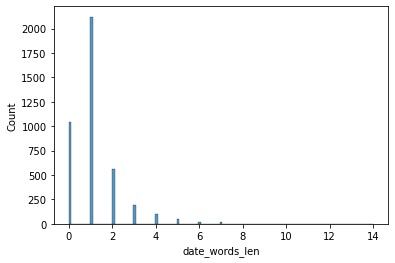

In [110]:
sns.histplot(data=df_sample, x="date_words_len");